In [5]:
!pip install plotly

     |████████████████████████████████| 11.5MB 2.6MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=43d4d5cb0b6b81025f2aba282fafaab0ccf4a3fd44ae010808d9ad5f48d07a7f
  Stored in directory: /Users/joyce/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


# 1.import data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud
import warnings

In [3]:
df_anime = pd.read_csv('anime_cleaned.csv')
df_users = pd.read_csv('users_cleaned2.csv')
df_userlists = pd.read_csv('animelists_cleaned.csv')

In [4]:
df_anime.info()
df_users.info()
df_userlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
anime_id           6668 non-null int64
title              6668 non-null object
title_english      3438 non-null object
title_japanese     6663 non-null object
title_synonyms     4481 non-null object
image_url          6666 non-null object
type               6668 non-null object
source             6668 non-null object
episodes           6668 non-null int64
status             6668 non-null object
airing             6668 non-null bool
aired_string       6668 non-null object
aired              6668 non-null object
duration           6668 non-null object
rating             6668 non-null object
score              6668 non-null float64
scored_by          6668 non-null int64
rank               6312 non-null float64
popularity         6668 non-null int64
members            6668 non-null int64
favorites          6668 non-null int64
background         813 non-null object
premiered          2

In [5]:
df_anime['members'] = df_anime['members'].astype(float)
df_anime['rank'] = df_anime['rank'].astype(float)

In [99]:
#df_anime.info()

In [6]:
anime = df_anime[df_anime.genre.notnull()][['anime_id','title','type','source','score','scored_by','rank','popularity','genre','members','episodes']]
users = df_users[df_users.gender.isin(['Female','Male'])][['username','user_id','gender','user_completed','user_days_spent_watching','age' ]]
userlists = df_userlists[df_userlists.my_status.isin([1,2]) & df_userlists.anime_id.notnull()][['anime_id', 'username', 'my_score', ]]

userlists = pd.merge(userlists,users, how='inner')
userlists = pd.merge(userlists,anime, how='left')

userlists_sub = userlists[userlists.genre.notnull()].head(100000)
userlists_sub.head()

,anime_id,username,my_score,user_id,gender,user_completed,user_days_spent_watching,age,title,type,source,score,scored_by,rank,popularity,genre,members,episodes
0,21,karthiga,9,2255153,Female,49,55.091667,30,One Piece,TV,Manga,8.54,423868.0,91.0,35.0,"Action, Adventure, Comedy, Super Power, Drama,...",720133.0,0.0
1,59,karthiga,7,2255153,Female,49,55.091667,30,Chobits,TV,Manga,7.53,175388.0,1546.0,188.0,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen",317641.0,26.0
2,74,karthiga,7,2255153,Female,49,55.091667,30,Gakuen Alice,TV,Manga,7.77,33244.0,941.0,1291.0,"Comedy, School, Shoujo, Super Power",62951.0,26.0
3,120,karthiga,7,2255153,Female,49,55.091667,30,Fruits Basket,TV,Manga,7.77,167968.0,939.0,222.0,"Slice of Life, Comedy, Drama, Romance, Fantasy...",292572.0,26.0
4,178,karthiga,7,2255153,Female,49,55.091667,30,Ultra Maniac,TV,Manga,7.26,9663.0,2594.0,2490.0,"Magic, Comedy, Romance, School, Shoujo",22778.0,26.0


In [101]:
userlists[userlists['user_id']== 3].head(50)  #看看user id=3的这个人给几个anime评了分...

,anime_id,username,my_score,user_id,gender,user_completed,user_days_spent_watching,age,title,type,source,score,scored_by,rank,popularity,genre,members,episodes
5664469,210,Aokaado,9,3,Male,133,59.084028,32,Ranma ½,TV,Manga,7.85,59911.0,802.0,623.0,"Slice of Life, Comedy, Martial Arts, Fantasy",134537.0,161.0
5664470,249,Aokaado,0,3,Male,133,59.084028,32,InuYasha,TV,Manga,7.90,181978.0,697.0,141.0,"Action, Adventure, Comedy, Historical, Demons,...",371313.0,167.0
5664471,269,Aokaado,9,3,Male,133,59.084028,32,Bleach,TV,Manga,7.90,433097.0,693.0,18.0,"Action, Adventure, Comedy, Super Power, Supern...",819284.0,366.0
5664472,853,Aokaado,10,3,Male,133,59.084028,32,Ouran Koukou Host Club,TV,Manga,8.34,335137.0,205.0,69.0,"Comedy, Harem, Romance, School, Shoujo",538843.0,26.0
5664473,1698,Aokaado,10,3,Male,133,59.084028,32,Nodame Cantabile,TV,Manga,8.41,87363.0,163.0,381.0,"Music, Slice of Life, Comedy, Drama, Romance, ...",198927.0,23.0
5664474,4224,Aokaado,9,3,Male,133,59.084028,32,Toradora!,TV,Light novel,8.39,557898.0,174.0,13.0,"Slice of Life, Comedy, Romance, School",910373.0,25.0
5664475,4477,Aokaado,9,3,Male,133,59.084028,32,Nodame Cantabile: Paris-hen,TV,Manga,8.24,53908.0,281.0,988.0,"Music, Slice of Life, Comedy, Romance, Josei",85660.0,11.0
5664476,5690,Aokaado,0,3,Male,133,59.084028,32,Nodame Cantabile Finale,TV,Manga,8.34,47983.0,203.0,995.0,"Comedy, Josei, Music, Romance",84808.0,11.0
5664477,6045,Aokaado,6,3,Male,133,59.084028,32,Kimi ni Todoke,TV,Manga,8.13,212710.0,400.0,111.0,"Slice of Life, Drama, Romance, School, Shoujo",417136.0,25.0
5664478,1,Aokaado,10,3,Male,133,59.084028,32,Cowboy Bebop,TV,Original,8.81,365465.0,27.0,38.0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",707773.0,26.0


In [102]:
userlists_sub.count()

anime_id                    100000
username                    100000
my_score                    100000
user_id                     100000
gender                      100000
user_completed              100000
user_days_spent_watching    100000
age                         100000
title                       100000
type                        100000
source                      100000
score                       100000
scored_by                   100000
rank                         98798
popularity                  100000
genre                       100000
members                     100000
episodes                    100000
dtype: int64

In [103]:
len(userlists['user_id'].unique())

105739

# 2.Data Visualization

2.A In Terms Of Rank And Popularity TOP 100 Animes (Plotly Bubble Chart, WordCloud, PointPlot)¶

In [67]:
anime_rank_100 = df_anime[df_anime.popularity!=0].sort_values(by='popularity').head(100).loc[:,['popularity','rank', 'title','type', 'source', 'scored_by','favorites','score','members','genre']]
popularity_and_rank_100 = anime_rank_100[(anime_rank_100.popularity <= 100)]
#popularity_and_rank_100["point"] = (popularity_and_rank_100["scored_by"] * popularity_and_rank_100["favorites"] * popularity_and_rank_100["score"]) / 10000000000
popularity_and_rank_100



,popularity,rank,title,type,source,scored_by,favorites,score,members,genre
3802,1,51.0,Death Note,TV,Manga,1009477,88696,8.67,1456378.0,"Mystery, Police, Psychological, Supernatural, ..."
3897,2,110.0,Shingeki no Kyojin,TV,Manga,940211,64032,8.49,1345842.0,"Action, Military, Mystery, Super Power, Drama,..."
3009,3,1259.0,Sword Art Online,TV,Light novel,915986,50042,7.64,1301616.0,"Action, Adventure, Fantasy, Game, Romance"
1261,4,1.0,Fullmetal Alchemist: Brotherhood,TV,Manga,733592,106895,9.25,1199091.0,"Action, Military, Adventure, Comedy, Drama, Ma..."
4215,5,44.0,One Punch Man,TV,Web manga,691845,30747,8.73,1020754.0,"Action, Sci-Fi, Comedy, Parody, Super Power, S..."
...,...,...,...,...,...,...,...,...,...,...
5455,96,610.0,Byousoku 5 Centimeter,Movie,Original,280982,7832,7.95,457791.0,"Drama, Romance, Slice of Life"
1785,97,437.0,Higurashi no Naku Koro ni,TV,Visual novel,221985,15819,8.10,452086.0,"Mystery, Dementia, Horror, Psychological, Supe..."
6286,98,394.0,Black Lagoon,TV,Manga,233227,9708,8.13,449033.0,"Action, Seinen"
1915,99,369.0,Dragon Ball,TV,Manga,286046,8598,8.15,444597.0,"Adventure, Comedy, Fantasy, Martial Arts, Shou..."


In [68]:
anime_rank_100.to_csv(r'\anime_rank_100.csv',index=False, header=True)

popularity and rank 都在50以内的动画片,共11个
新变量"point":score差别很小所以把scored_by(参与评分的人数)favorites(喜欢这部动画的人数)score(动画评分)考虑了进来,calculate成新变量

In [30]:
anime_rank_50 = df_anime[df_anime.popularity!=0].sort_values(by='rank').head(50).loc[:,['popularity','rank', 'title','type', 'source', 'scored_by','favorites','score','members']]
popularity_and_rank_50 = anime_rank_50[(anime_rank_50.popularity <= 50)]
popularity_and_rank_50["point"] = (popularity_and_rank_50["scored_by"] * popularity_and_rank_50["favorites"] * popularity_and_rank_50["score"]) / 10000000000   #popularity_and_rank_50["favorites"] * 
popularity_and_rank_50
#anime_rank_50


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,popularity,rank,title,type,source,scored_by,favorites,score,members,point
1261,4,1.0,Fullmetal Alchemist: Brotherhood,TV,Manga,733592,106895,9.25,1199091.0,72.536018
529,33,2.0,Kimi no Na wa.,Movie,Original,471398,34912,9.19,730076.0,15.124394
1475,8,5.0,Steins;Gate,TV,Visual novel,563857,92423,9.14,1010330.0,47.631607
223,35,8.0,Hunter x Hunter (2011),TV,Manga,403377,64375,9.11,720920.0,23.656296
3550,22,18.0,Code Geass: Hangyaku no Lelouch R2,TV,Original,543904,44230,8.95,791396.0,21.530902
3404,39,19.0,Sen to Chihiro no Kamikakushi,Movie,Original,498602,15412,8.92,705769.0,6.854533
5579,37,21.0,Shigatsu wa Kimi no Uso,TV,Manga,413527,39664,8.88,717655.0,14.565096
4358,38,27.0,Cowboy Bebop,TV,Original,365465,39145,8.81,707773.0,12.603698
6579,9,30.0,Code Geass: Hangyaku no Lelouch,TV,Original,627740,63614,8.79,986897.0,35.101153
5237,24,41.0,Tengen Toppa Gurren Lagann,TV,Original,449656,50040,8.74,787535.0,19.665687


In [31]:
data = [
    {
        'y':popularity_and_rank_50["popularity"],
        'x': popularity_and_rank_50["rank"],
        'mode': 'markers',
        'marker': {
            'color': popularity_and_rank_50["popularity"],
            'size':  popularity_and_rank_50["point"],
            'showscale': True,
            'sizemin':4,
        },
        "text" :  popularity_and_rank_50["title"]
    }
]

layout = go.Layout(title='In Terms Of Rank And Popularity TOP 50 Animes',
                   xaxis=dict(title='Rank'),
                   yaxis=dict( title='Popularity'),
                   autosize=False,
                   width=900,
                   height=800
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [32]:
anime_sorted_by_pop = df_anime[df_anime.popularity!=0].sort_values(by='popularity').head(100).loc[:,['title','popularity','rank']]
anime_sorted_by_pop.head()



,title,popularity,rank
3802,Death Note,1,51.0
3897,Shingeki no Kyojin,2,110.0
3009,Sword Art Online,3,1259.0
1261,Fullmetal Alchemist: Brotherhood,4,1.0
4215,One Punch Man,5,44.0


2.B. The Most Popular Genres In The Anime Industry (With Multi-label Tags) (Bar Plots, Pie Chart, WordCloud)

In [33]:
anime_genre = anime.genre
anime_genre.head()

0      Comedy, Supernatural, Romance, Shounen
1    Comedy, Parody, Romance, School, Shounen
2               Comedy, Magic, School, Shoujo
3      Comedy, Drama, Magic, Romance, Fantasy
4             Comedy, Drama, Romance, Shounen
Name: genre, dtype: object

In [71]:
genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)     
genre_splited[0:15]


['Comedy',
 'Supernatural',
 'Romance',
 'Shounen',
 'Comedy',
 'Parody',
 'Romance',
 'School',
 'Shounen',
 'Comedy',
 'Magic',
 'School',
 'Shoujo',
 'Comedy',
 'Drama']

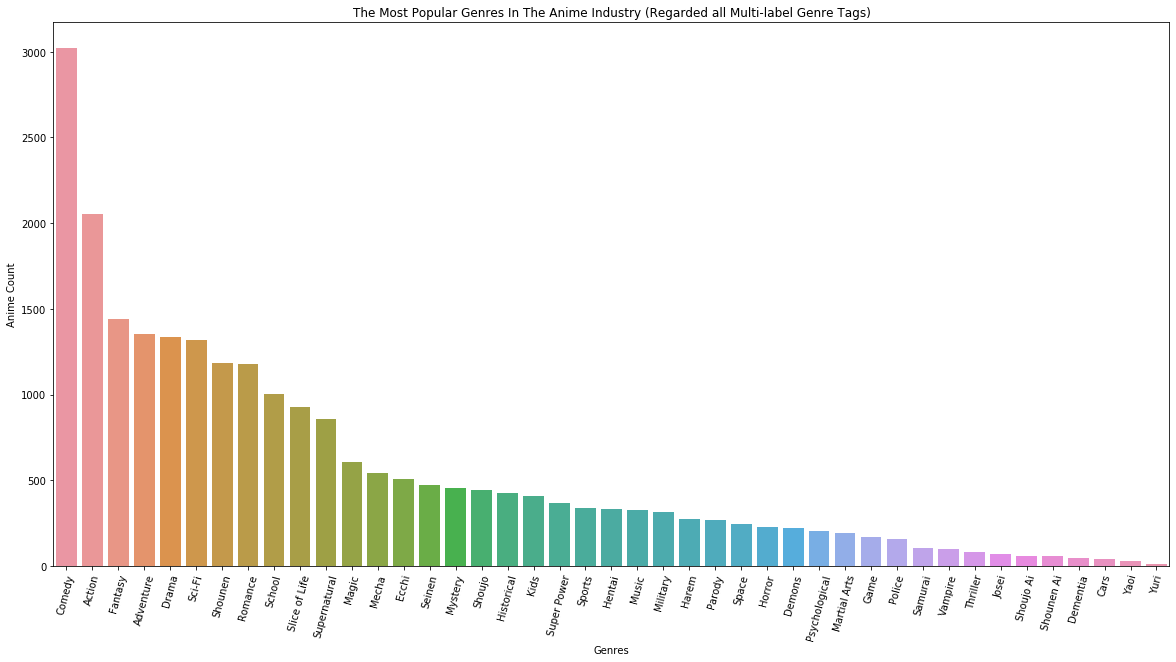

In [35]:
anime_genres_count = pd.Series(genre_splited).value_counts() 

plt.figure(figsize=(20,10))
sns.barplot(x=anime_genres_count.index.tolist(), y=anime_genres_count.tolist())
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 75) 
plt.show()

In [122]:
##In the second chart, i counted first tags from multilabels, and singular tags. In this chart each anime has one genre.

#genre_firsts = []

#for i in anime_genre.index:
    #genre_firsts.append(anime_genre[i].split(", ")[0])
    

#anime_genres_firsts = pd.Series(genre_firsts).value_counts()   

#plt.figure(figsize=(10,12))
#sns.barplot(x=anime_genres_firsts[0:25].tolist(), y=anime_genres_firsts[0:25].index.tolist())
#plt.xlabel('Anime Count')
#plt.ylabel('Genres')
#plt.title('25 Of The Most Popular Genres In The Anime Industry (Considered First Genre Tag)') 
#plt.show()

In [64]:
#In the third chart i showed tags coexisting with comedy tag.

genres_with_comedy = []
for i in anime_genre.index:
    if anime_genre[i].find('Comedy') > -1:
        for j in anime_genre[i].split(", "):
            if j != 'Comedy':
                genres_with_comedy.append(j) 
                
genres_with_comedy_count = pd.Series(genres_with_comedy).value_counts().head(10)   

fig = {
  "data": [
    {
      "values": genres_with_comedy_count.tolist(),
      "labels": genres_with_comedy_count.index.tolist(),
      "domain": {"x": [0, .8]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie",
    
    },],
  "layout": {
        "title":"Top 10 Multi-label Tags With Comedy"
    },
}


iplot(fig)



Features of Anime (Release, Types, Sources) (Bar Plots, Stacked Bar Plot)

In [188]:
animetypes = df_anime['type'].value_counts(dropna=False)
print(animetypes)

TV         2980
OVA        1345
Special     929
Movie       908
ONA         408
Music        98
Name: type, dtype: int64


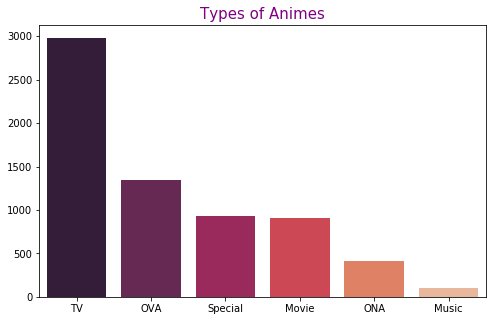

In [189]:
plt.figure(figsize=(8,5))
sns.barplot(x=animetypes.index,y=animetypes.values, palette="rocket")
plt.title('Types of Animes',color = 'purple',fontsize=15)
plt.show()

In [190]:
animesources= df_anime['source'].value_counts(dropna=False)
animesources = animesources[animesources.index != 'Unknown']
animesources.head(5)

Manga           2493
Original        1789
Light novel      512
Visual novel     482
Game             424
Name: source, dtype: int64

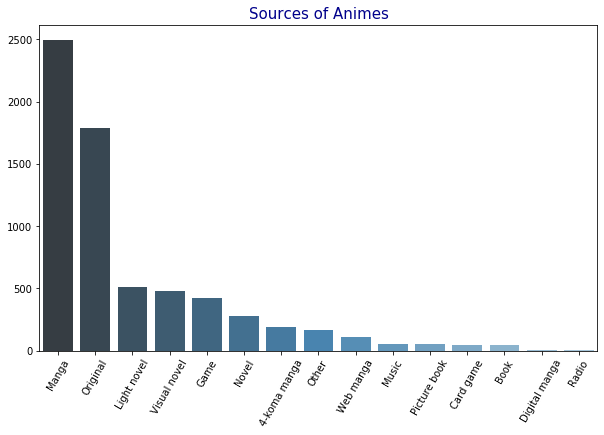

In [191]:
plt.figure(figsize=(10,6))
sns.barplot(x=animesources.index,y=animesources.values, palette="Blues_d")
plt.xticks(rotation=60)
plt.title('Sources of Animes',color = 'darkblue',fontsize=15)
plt.show()

In [22]:
anime_movies = df_anime[(df_anime.type == "Movie") & (df_anime.aired_string != "Not available")]
anime_movies["year"] = [x.split(",")[1].strip()[0:4] if len(x.split(",")) > 1 else x.split(",")[0].strip()[0:4] for x in anime_movies["aired_string"]]
#location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in df_users["location"].astype("str")]
anime_movies = anime_movies["year"].value_counts()
anime_movies_years = pd.DataFrame({'Year':anime_movies.index, 'Movie Count':anime_movies.values})
anime_movies_years = anime_movies_years.sort_values("Year")
#i think 2018 and 2019 is incomplete
anime_movies_years = anime_movies_years.iloc[:-1,:]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
fig = px.line(anime_movies_years, x="Year", y="Movie Count", 
              title='Anime Movies by Years', width=900, height=1000)
fig.show()

In [26]:
anime_tv = df_anime[(df_anime.type == "TV") & (df_anime.aired_string != "Not available")]
anime_tv["year"] = [x.split(",")[1].strip()[0:4] if len(x.split(",")) > 1 else x.split(",")[0].strip()[0:4] for x in anime_tv["aired_string"]]
#location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in df_users["location"].astype("str")]
anime_tv = anime_tv["year"].value_counts()
anime_tv_years = pd.DataFrame({'Year':anime_tv.index, 'TV Series Count':anime_tv.values})
anime_tv_years = anime_tv_years.sort_values("Year")
#i think 2018 and 2019 is incomplete
anime_tv_years = anime_tv_years.iloc[:-1,:]



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
fig = px.line(anime_tv_years, x="Year", y="TV Series Count", 
              title='Anime TV Series by Years', width=900, height=1000)
fig.show()

2.C. Genre Preferences According to Gender And Age-Gender Correlation (Bar Plots as Subplot, Scatter Plot, Boxplot)

In [204]:
##compared males and females for anime genre preferences.
##For a quick calculation, i considered only 100k rows. Even so result is sensible. When i run for 1m rows, the result is same.

# for 43 genre
F = [0]*43
M =   [0]*43

genre_df = pd.DataFrame({'genre': genre_list, 'Female': F, 'Male': M})
genre_df.set_index('genre', inplace=True)

for i in userlists_sub.index:
    for j in userlists_sub.genre[i].split(", "):
        genre_df[userlists_sub.gender[i]][j] +=1 
        
genre_df.head()


,Female,Male
genre,,
Comedy,10784,40316
Supernatural,5119,18518
Romance,6342,22469
Shounen,5287,20732
Parody,784,3201


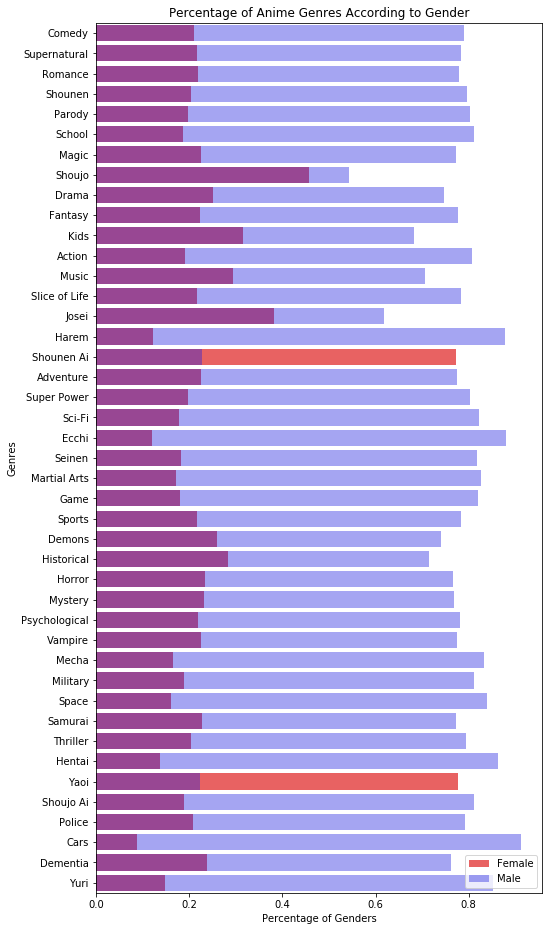

In [205]:
#genre
#在各种动画分类中,女性受众比例都远远低于男性，然而只有在ShounenAi和Yaoi类动画里,女性的比例遥遥领先于男性。why?为什么男生不看百合啊？
Female = []
Male = []

for i in genre_list:
    Female.append(genre_df.loc[i,'Female']/sum(genre_df.loc[i,:]))
    Male.append(genre_df.loc[i,'Male']/sum(genre_df.loc[i,:]))  

f,ax = plt.subplots(figsize=(8,16))
sns.barplot(x=Female, y=genre_list, label='Female', color='r', alpha = 0.7)
sns.barplot(x=Male, y=genre_list, label='Male', color='b', alpha = 0.4)

ax.set(xlabel='Percentage of Genders', ylabel='Genres', title='Percentage of Anime Genres According to Gender')
ax.legend(loc='lower right',frameon= True)
plt.show()

In [ ]:
## compare gender in days spent watching

In [206]:
##检查一下age
print (users.age.max())
print (users.age.min())

51
11


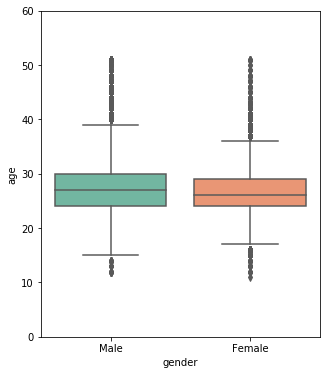

In [38]:
##use boxplot to see outliers of gender and age. 不用展示
##since i use cleaned data so, no outliners of age

#users['birth_date'] = pd.to_datetime(users['birth_date'], errors = 'coerce')
users=users[users.age.notnull()]

age = users.age
gender = users.gender
spent = users.user_days_spent_watching
 
#age = []
#for each in birth_date:
    #age.append(round((datetime.datetime.now()-each).days/365.25,1))
    
age_dict = {'gender':gender,'age':age,'spent':spent}
users_age_spent = pd.DataFrame(age_dict,columns=['gender','age','spent'])

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(data=users_age_spent, x="gender", y="age", palette="Set2", ax=ax)
ax.set_ylim([0, 60])
plt.show()

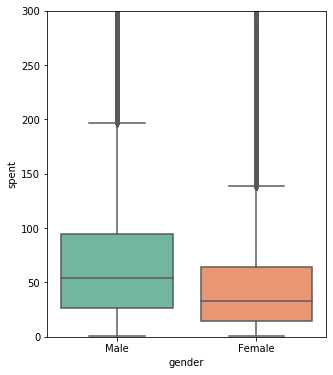

In [39]:
##use boxplot to see outliers of gender and spent. 不用展示


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="spent", data=users_age_spent, palette="Set2", ax=ax)
ax.set_ylim([0, 300])
plt.show()

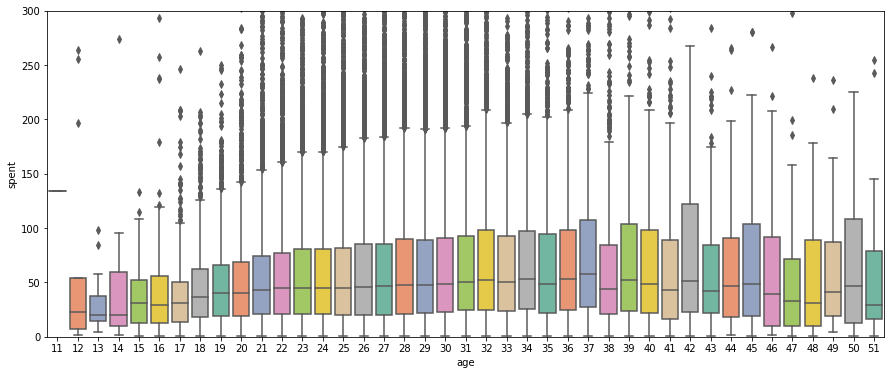

In [177]:
##不用展示
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 6))
sns.boxplot(x="age", y="spent", data=users_age_spent, palette="Set2", ax=ax)
ax.set_ylim([0, 300])
plt.show()

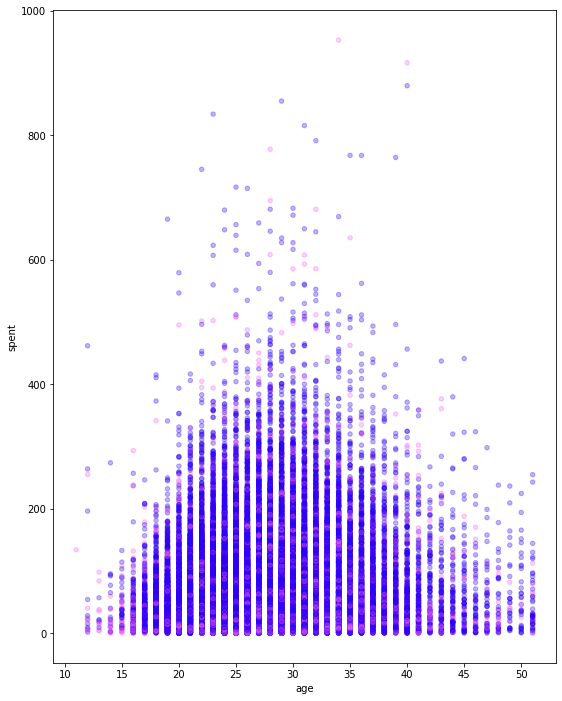

In [46]:
##成年人也看动画片,Anime watchers' age range seems to be between 17-40 mostly,这部分人的观看天数也很长

users_age_spent.plot(kind='scatter', x='age', y='spent', alpha=0.3, figsize = (9,12),
                     color=["#F860F7" if each =="Female" else "#2D00F7" for each in users_age_spent.gender])
plt.show()

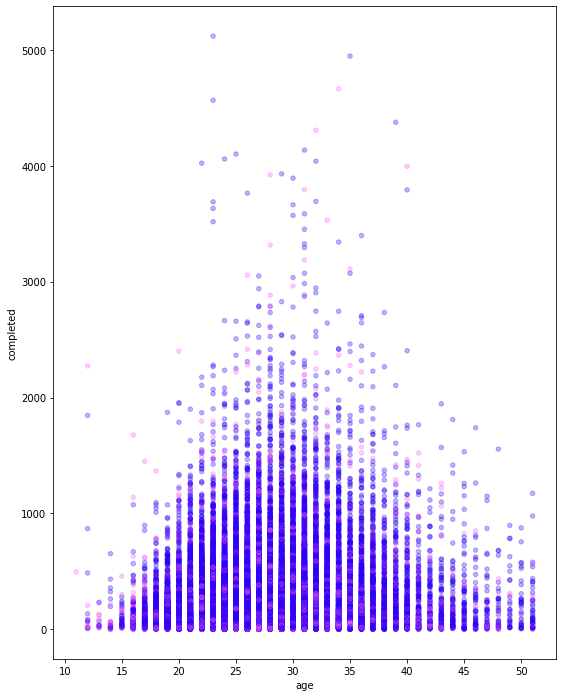

In [43]:
users=users[users.age.notnull()]

age = users.age
gender = users.gender
completed = users.user_completed
 
#age = []
#for each in birth_date:
    #age.append(round((datetime.datetime.now()-each).days/365.25,1))
    
age_dict = {'gender':gender,'age':age,'completed':completed}
users_age_completed = pd.DataFrame(age_dict,columns=['gender','age','completed'])


users_age_completed.plot(kind='scatter', x='age', y='completed', alpha=0.3, figsize = (9,12),
                     color=["#F860F7" if each =="Female" else "#2D00F7" for each in users_age_completed.gender])
plt.show()

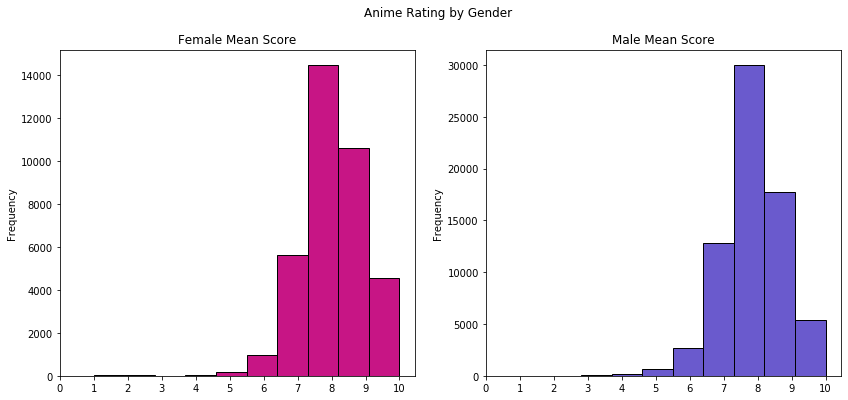

In [187]:
##generally, 分数分布similar, 最经常看动画的男性女性打出的score在7-9分

F_stats = df_users[(df_users["gender"]=='Female') & (df_users["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]     
M_stats = df_users[(df_users["gender"]=='Male') & (df_users["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]    

f,ax=plt.subplots(1,2,figsize=(14,6))
F_stats.stats_mean_score.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='mediumvioletred')  #bins: Number of histogram bins to be used.
ax[0].set_title('Female Mean Score')
x1=list(range(0,11,1))
ax[0].set_xticks(x1)
M_stats.stats_mean_score.plot.hist(ax=ax[1],bins=10,edgecolor='black',color='slateblue')
ax[1].set_title('Male Mean Score')
x2=list(range(0,11,1))
ax[1].set_xticks(x2)
plt.suptitle('Anime Rating by Gender')
plt.show()

2.D. Anime Watchers Around The World (In MyAnimeList Members) (Plotly Map Plot)